In [52]:
#import libraries
import csv
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from os import system
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

In [54]:
#data import
file1='C:\\Users\\anush\\Desktop\\bank.csv'
head=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']
training1 = pd.read_csv(file1,sep=',',skiprows=[0],names=head)
print(training1.head())
selectfeatures=training1.loc[:,['age','default','duration']]
X2=pd.get_dummies(selectfeatures)
X = (X2 - X2.mean()) / X2.std()
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
        age  duration  default_no  default_yes
0  1.836349 -0.012779    0.159003    -0.159003
1  0.357070 -0.44

In [55]:
y2=training1.loc[:,['y']]
y2['TargetClass']=np.where(y2['y']=="no",0,1)
y2.describe()


,TargetClass
count,3000.000000
mean,0.025667
std,0.158165
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


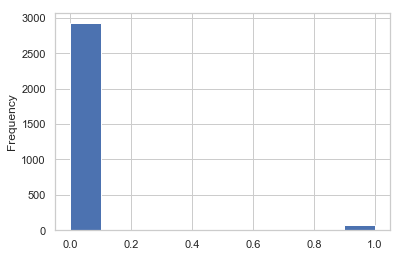

In [56]:
y2['TargetClass'].plot.hist()
y=y2.loc[:,['TargetClass']]

In [57]:
#learning curve function
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [58]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

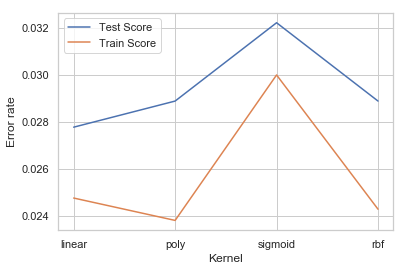

In [12]:
#Rough SVM
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = SVC(kernel = kernel[i], random_state = 121)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.001, kernel=linear ..........................................
[CV] . C=0.001, kernel=linear, score=0.9743223965763196, total=   0.0s
[CV] C=0.001, kernel=linear ..........................................
[CV] . C=0.001, kernel=linear, score=0.9757142857142858, total=   0.0s
[CV] C=0.001, kernel=linear ..........................................
[CV] . C=0.001, kernel=linear, score=0.9756795422031473, total=   0.0s
[CV] C=0.005, kernel=linear ..........................................
[CV] . C=0.005, kernel=linear, score=0.9743223965763196, total=   0.0s
[CV] C=0.005, kernel=linear ..........................................
[CV] . C=0.005, kernel=linear, score=0.9757142857142858, total=   0.0s
[CV] C=0.005, kernel=linear ..........................................
[CV] . C=0.005, kernel=linear, score=0.9756795422031473, total=   0.0s
{'C': 0.001, 'kernel': 'linear'}


SVC(C=0.001, cache_size=200, class_weight=None, coef0=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


0.9752387414979174


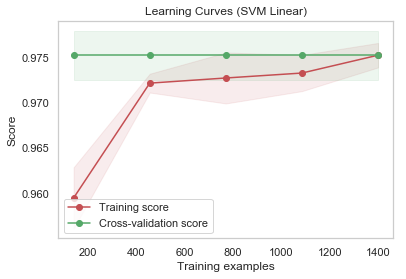

In [59]:
#Linear with CV using Grid search and Learning Curve
param_grid = {'C': [0.001,0.005], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)



title = "Learning Curves (SVM Linear)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator2 = SVC(kernel = 'linear',C=0.001, random_state = 121)
plot_learning_curve(estimator2, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscore2=cross_val_score(estimator2, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore2.mean())

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.9743223965763196, total=   0.0s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.9757142857142858, total=   0.0s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV]  C=0.01, degree=2, kernel=poly, score=0.9756795422031473, total=   0.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.9757489300998573, total=   0.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.9757142857142858, total=   0.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.9756795422031473, total=   0.0s
[CV] C=0.01, degree=4, kernel=poly ................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, degree=4, kernel=poly, score=0.9757142857142858, total=   0.0s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV]  C=0.01, degree=4, kernel=poly, score=0.9756795422031473, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.9743223965763196, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.9757142857142858, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.9742489270386266, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.9757489300998573, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV]  C=0.1, degree=3, kernel=poly, score=0.9757142857142858, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ......

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   11.5s finished


{'C': 1, 'degree': 4, 'kernel': 'poly'}


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9761918056392535


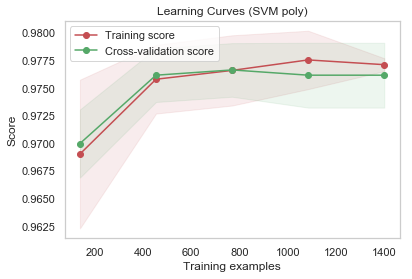

In [60]:
#Poly with CV using GridSearch
param_grid = {'degree': [2,3,4], 'kernel': ['poly'],'C': [0.01,0.1,1,10]} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator3 = SVC(kernel = 'poly',C=1,degree=4, random_state = 121)
plot_learning_curve(estimator3, title, X_train, y_train,cv=cv)
crossvalscore3=cross_val_score(estimator3, X_train, y_train, cv=3)
print(crossvalscore3.mean())

0.9747618697764105


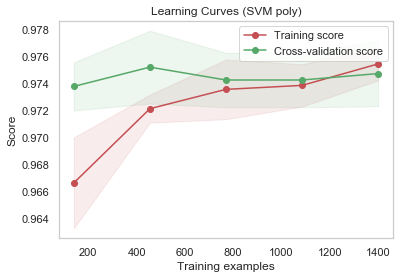

In [14]:
#Poly with CV degree 2 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator3 = SVC(kernel = 'poly',degree=2, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore3=cross_val_score(estimator3, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore3.mean())

In [15]:
#Poly with CV degree 3 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator4 = SVC(kernel = 'poly',degree=3, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore4=cross_val_score(estimator4, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore4.mean())

0.9757142526724301


0.9761918056392535


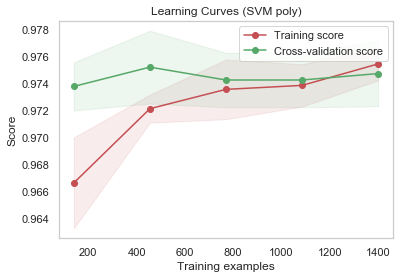

In [16]:
#Poly with CV degree 4 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator5 = SVC(kernel = 'poly',degree=4, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore5=cross_val_score(estimator5, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore5.mean())

In [17]:
#Poly with CV degree 6 and Learning Curve
title = "Learning Curves (SVM poly)"
#cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator6 = SVC(kernel = 'poly',degree=6, random_state = 121)
#plot_learning_curve(estimator6, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore6=cross_val_score(estimator6, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore6.mean())

0.9752380621962397


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9743223965763196, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9757142857142858, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9756795422031473, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9743223965763196, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9757142857142858, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9756795422031473, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf .....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9743223965763196, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9757142857142858, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9756795422031473, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9743223965763196, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9757142857142858, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9756795422031473, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9743223965763196, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


0.9757162944647408


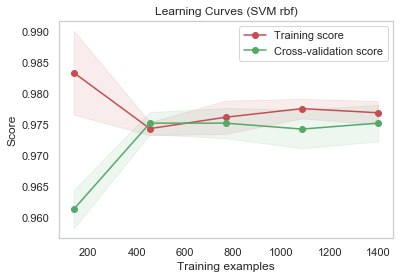

In [61]:
#RBF with CV using Grid search and Learning Curve
from sklearn.model_selection import KFold

param_grid = {'C': [0.01,0.1,1,10], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)


estimator1 = SVC(kernel = 'rbf', C=10, gamma=0.1, random_state = 121)
title = "Learning Curves (SVM rbf)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
plot_learning_curve(estimator1, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore1=cross_val_score(estimator1, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore1.mean())

In [62]:
#Descision trees with different depth,leaf nodes, samples split
param_grid = {"criterion": ["gini", "entropy"],
             "min_samples_split": [2,3,4,5],
             "max_depth": [2,3,4,5],
             "min_samples_leaf": [5,10,15,20],
             "max_leaf_nodes": [2,3,4,5]
             }

dt = DecisionTreeClassifier()
ts_gs = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3, return_train_score=True)
ts_gs.fit(X_train,y_train)
print (ts_gs.best_params_)
print ('\n')
print (ts_gs.best_estimator_)

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


0.9690523352865928


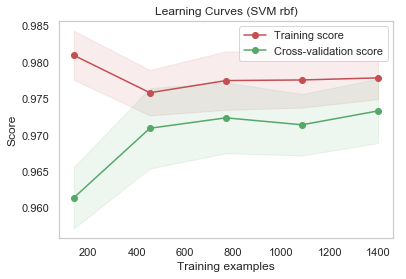

In [63]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
ts_gs=DecisionTreeClassifier(criterion = 'gini',max_depth=2, max_leaf_nodes = 5, min_samples_leaf=5, min_samples_split=2)
plot_learning_curve(ts_gs, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(ts_gs, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())

{'learning_rate': 0.01, 'n_estimators': 40}
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
          learning_rate=0.01, n_estimators=40, random_state=None)
2
0.9733366967998672


{'learning_rate': 0.1, 'n_estimators': 10}
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
    

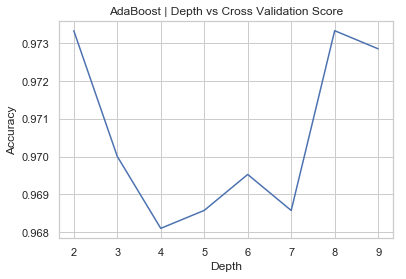

In [65]:
#Adaboost with CV using Grid search and Learning Curve
score_ada=[]
tuned_parameters = {'learning_rate':[0.01,0.1,1],'n_estimators':[10,20,30,40]}
for i in range(2,10):
   classifier_choice= AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=5,min_samples_split=2, random_state=2))
   param_grid_ada= GridSearchCV(classifier_choice,tuned_parameters,cv=3, return_train_score=True)
   param_grid_ada.fit(X_train,y_train)
   print (param_grid_ada.best_params_)
   print (param_grid_ada.best_estimator_)
   crossvalscore_ada=cross_val_score(param_grid_ada, X_train, y_train, cv=3, n_jobs=-1)
   print(i)
   print(crossvalscore_ada.mean())
   print ('\n')
   score_ada.append((i,crossvalscore_ada.mean()))

score_ada_df=pd.DataFrame(score_ada)
plt.plot(score_ada_df.iloc[:,0],score_ada_df.iloc[:,1])
plt.title("AdaBoost | Depth vs Cross Validation Score")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

In [66]:
#reporting E out for rbf
estimator1.fit(X_train, y_train)
eout1=estimator1.predict(X_test)

In [68]:
print(confusion_matrix(y_test,eout1))

[[871   4]
 [ 24   1]]
